# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
# Import library yang dibutuhkan
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
# Memuat dataset hasil clustering dari file CSV
file_path = '/content/hasil_clustering.csv'  # Path file yang diunggah
df = pd.read_csv(file_path)

# Menampilkan beberapa baris pertama untuk memastikan data dimuat dengan benar
df.head()

,Order_ID,Customer_ID,Customer_Type,Product,Category,Quantity,Discount,Total_Price,Region,Order_Date,Cluster,PCA1,PCA2
0,1018,224,1,25,2,9.0,0.0,5.22,1,809,0,0.350063,-0.701568
1,1351,1437,1,42,3,5.0,0.0,11.30,0,8,2,1.383353,-0.331343
2,1351,1437,1,29,1,14.0,0.0,19.74,0,8,0,0.056050,0.330548
3,1462,1036,1,13,1,12.0,0.0,28.20,14,550,1,-1.673743,0.258418
4,1462,1036,1,10,2,4.0,0.0,6.84,14,550,0,1.499605,-0.878156


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [3]:
# Memilih fitur dan target
X = df[['Quantity', 'Discount', 'Total_Price', 'PCA1', 'PCA2']]  # Fitur
y = df['Cluster']  # Target (Cluster)

# Membagi data menjadi data latih dan uji (training set dan test set)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Menampilkan ukuran data latih dan uji
print("Ukuran data latih:", X_train.shape)
print("Ukuran data uji:", X_test.shape)

Ukuran data latih: (1957, 5)
Ukuran data uji: (839, 5)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [4]:
from sklearn.ensemble import RandomForestClassifier

# Inisialisasi model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Kemudian fit modelnya
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [5]:
from sklearn.impute import SimpleImputer

# Inisialisasi imputasi dengan strategi rata-rata
imputer = SimpleImputer(strategy='mean')

# Terapkan imputasi pada data fitur X
X_imputed = imputer.fit_transform(X)

# Split data setelah imputasi
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3, random_state=42)

In [6]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [7]:
from sklearn.impute import SimpleImputer

# Menggunakan SimpleImputer untuk menggantikan NaN dengan nilai rata-rata
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Membagi data menjadi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3, random_state=42)

# Membangun model kembali
rf_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [8]:
# Import algoritma klasifikasi
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Membangun model menggunakan Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Membangun model menggunakan K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Menampilkan pesan bahwa model telah dilatih
print("Model Random Forest dan KNN telah berhasil dilatih.")

Model Random Forest dan KNN telah berhasil dilatih.


**- Random Forest:** adalah algoritma ensemble berbasis pohon keputusan (decision tree) yang bekerja dengan membangun banyak pohon keputusan (trees) selama pelatihan dan menghasilkan kelas output berdasarkan mayoritas hasil prediksi dari masing-masing pohon. Ini membantu mengurangi overfitting dan meningkatkan akurasi prediksi.

**- KNN:** adalah algoritma klasifikasi yang berbasis instance-learning, di mana objek baru diklasifikasikan berdasarkan mayoritas label dari K tetangga terdekatnya di ruang fitur. Tidak ada proses pelatihan eksplisit karena model hanya menyimpan data latih dan menghitung jarak saat prediksi.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

Evaluasi Model Random Forest:
Akurasi: 0.9976162097735399
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       331
           1       1.00      1.00      1.00       346
           2       1.00      0.99      0.99       162

    accuracy                           1.00       839
   macro avg       1.00      1.00      1.00       839
weighted avg       1.00      1.00      1.00       839

Evaluasi Model KNN:
Akurasi: 0.9058402860548271
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.93      0.89       331
           1       0.95      0.93      0.94       346
           2       0.96      0.81      0.88       162

    accuracy                           0.91       839
   macro avg       0.92      0.89      0.90       839
weighted avg       0.91      0.91      0.91       839



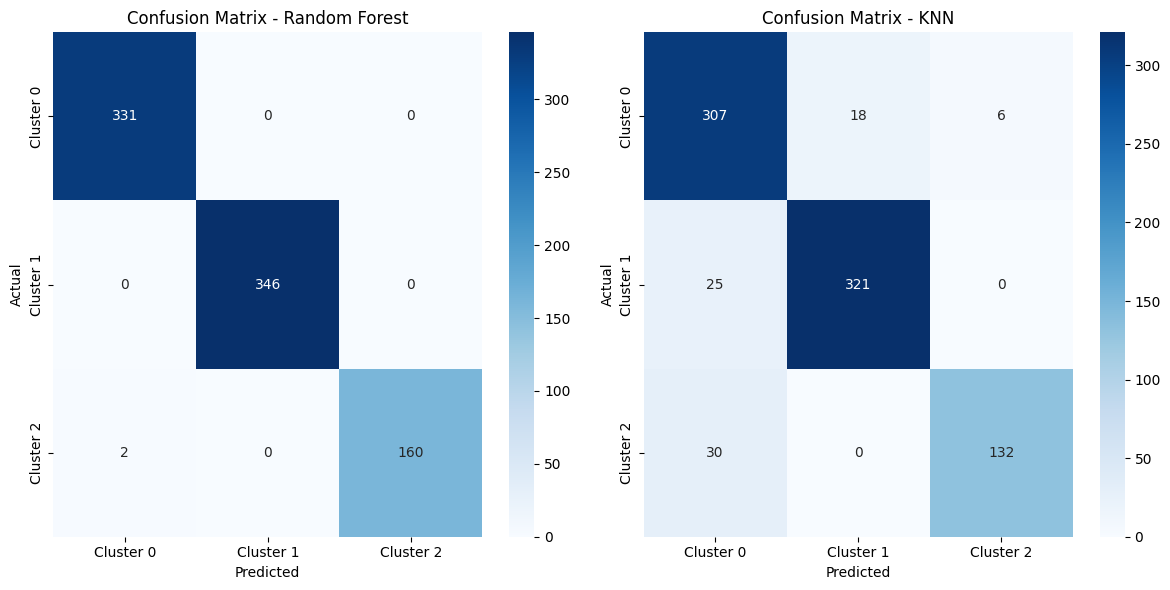

In [9]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Prediksi hasil pada data uji untuk Random Forest dan KNN
rf_y_pred = rf_model.predict(X_test)
knn_y_pred = knn_model.predict(X_test)

# 1. Menghitung metrik evaluasi: Accuracy, Precision, Recall, F1-Score
rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_report = classification_report(y_test, rf_y_pred)

knn_accuracy = accuracy_score(y_test, knn_y_pred)
knn_report = classification_report(y_test, knn_y_pred)

# Menampilkan hasil evaluasi
print("Evaluasi Model Random Forest:")
print(f"Akurasi: {rf_accuracy}")
print(f"Classification Report:\n{rf_report}")

print("Evaluasi Model KNN:")
print(f"Akurasi: {knn_accuracy}")
print(f"Classification Report:\n{knn_report}")

# 2. Membuat Confusion Matrix untuk Random Forest dan KNN
rf_cm = confusion_matrix(y_test, rf_y_pred)
knn_cm = confusion_matrix(y_test, knn_y_pred)

# Visualisasi Confusion Matrix dengan heatmap
plt.figure(figsize=(12, 6))

# Confusion Matrix untuk Random Forest
plt.subplot(1, 2, 1)
sns.heatmap(rf_cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Cluster 0", "Cluster 1", "Cluster 2"], yticklabels=["Cluster 0", "Cluster 1", "Cluster 2"])
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Confusion Matrix untuk KNN
plt.subplot(1, 2, 2)
sns.heatmap(knn_cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Cluster 0", "Cluster 1", "Cluster 2"], yticklabels=["Cluster 0", "Cluster 1", "Cluster 2"])
plt.title("Confusion Matrix - KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Tampilkan plot
plt.tight_layout()
plt.show()

Berdasarkan hasil evaluasi, Random Forest secara signifikan lebih unggul dibandingkan KNN dalam hal akurasi keseluruhan, stabilitas antar kelas, dan ketepatan klasifikasi. Oleh karena itu, Random Forest lebih direkomendasikan untuk digunakan pada dataset ini.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [10]:
from sklearn.model_selection import GridSearchCV

# Menentukan parameter grid untuk Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Menerapkan GridSearchCV untuk Random Forest
grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                              param_grid=param_grid_rf,
                              cv=5,
                              n_jobs=-1,
                              verbose=2)

# Melatih model dengan GridSearchCV
grid_search_rf.fit(X_train, y_train)

# Menampilkan hasil terbaik
print("Best parameters for Random Forest:")
print(grid_search_rf.best_params_)

# Menggunakan model terbaik untuk prediksi dan evaluasi
best_rf_model = grid_search_rf.best_estimator_
rf_y_pred_best = best_rf_model.predict(X_test)

# Evaluasi model terbaik
rf_accuracy_best = accuracy_score(y_test, rf_y_pred_best)
rf_report_best = classification_report(y_test, rf_y_pred_best)

print(f"Best Random Forest Accuracy: {rf_accuracy_best}")
print(f"Best Random Forest Classification Report:\n{rf_report_best}")


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters for Random Forest:
{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Best Random Forest Accuracy: 0.9964243146603099
Best Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       331
           1       1.00      1.00      1.00       346
           2       1.00      0.99      0.99       162

    accuracy                           1.00       839
   macro avg       1.00      0.99      1.00       839
weighted avg       1.00      1.00      1.00       839



In [11]:
# Menentukan parameter grid untuk KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Menerapkan GridSearchCV untuk KNN
grid_search_knn = GridSearchCV(estimator=KNeighborsClassifier(),
                               param_grid=param_grid_knn,
                               cv=5,
                               n_jobs=-1,
                               verbose=2)

# Melatih model dengan GridSearchCV
grid_search_knn.fit(X_train, y_train)

# Menampilkan hasil terbaik
print("Best parameters for KNN:")
print(grid_search_knn.best_params_)

# Menggunakan model terbaik untuk prediksi dan evaluasi
best_knn_model = grid_search_knn.best_estimator_
knn_y_pred_best = best_knn_model.predict(X_test)

# Evaluasi model terbaik
knn_accuracy_best = accuracy_score(y_test, knn_y_pred_best)
knn_report_best = classification_report(y_test, knn_y_pred_best)

print(f"Best KNN Accuracy: {knn_accuracy_best}")
print(f"Best KNN Classification Report:\n{knn_report_best}")

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters for KNN:
{'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Best KNN Accuracy: 0.9380214541120382
Best KNN Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.95      0.93       331
           1       0.97      0.96      0.96       346
           2       0.97      0.86      0.91       162

    accuracy                           0.94       839
   macro avg       0.94      0.92      0.93       839
weighted avg       0.94      0.94      0.94       839



## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

Evaluasi Model Random Forest setelah Tuning:
Akurasi: 0.9964243146603099
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       331
           1       1.00      1.00      1.00       346
           2       1.00      0.99      0.99       162

    accuracy                           1.00       839
   macro avg       1.00      0.99      1.00       839
weighted avg       1.00      1.00      1.00       839

Evaluasi Model KNN setelah Tuning:
Akurasi: 0.9380214541120382
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.95      0.93       331
           1       0.97      0.96      0.96       346
           2       0.97      0.86      0.91       162

    accuracy                           0.94       839
   macro avg       0.94      0.92      0.93       839
weighted avg       0.94      0.94      0.94       839



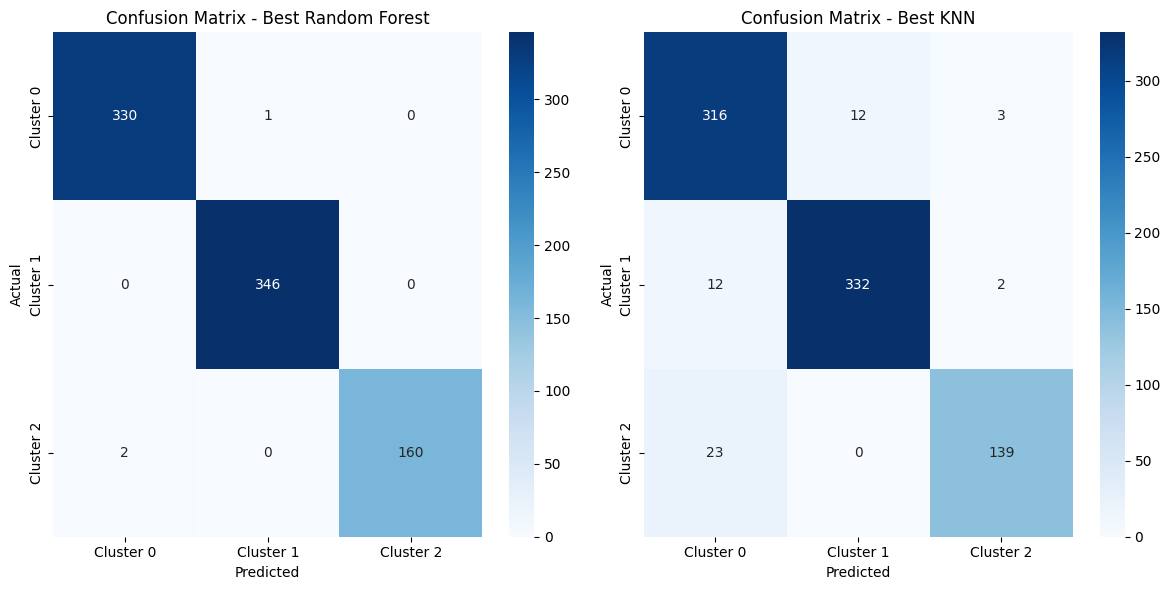

In [12]:
# Menggunakan model dengan hyperparameter terbaik untuk prediksi
rf_y_pred_best = best_rf_model.predict(X_test)
knn_y_pred_best = best_knn_model.predict(X_test)

# 1. Menghitung ulang metrik evaluasi: Accuracy, Precision, Recall, F1-Score
rf_accuracy_best = accuracy_score(y_test, rf_y_pred_best)
rf_report_best = classification_report(y_test, rf_y_pred_best)

knn_accuracy_best = accuracy_score(y_test, knn_y_pred_best)
knn_report_best = classification_report(y_test, knn_y_pred_best)

# Menampilkan hasil evaluasi untuk model dengan hyperparameter terbaik
print("Evaluasi Model Random Forest setelah Tuning:")
print(f"Akurasi: {rf_accuracy_best}")
print(f"Classification Report:\n{rf_report_best}")

print("Evaluasi Model KNN setelah Tuning:")
print(f"Akurasi: {knn_accuracy_best}")
print(f"Classification Report:\n{knn_report_best}")

# 2. Membuat Confusion Matrix untuk model terbaik
rf_cm_best = confusion_matrix(y_test, rf_y_pred_best)
knn_cm_best = confusion_matrix(y_test, knn_y_pred_best)

# Visualisasi Confusion Matrix dengan heatmap
plt.figure(figsize=(12, 6))

# Confusion Matrix untuk Random Forest
plt.subplot(1, 2, 1)
sns.heatmap(rf_cm_best, annot=True, fmt="d", cmap="Blues", xticklabels=["Cluster 0", "Cluster 1", "Cluster 2"], yticklabels=["Cluster 0", "Cluster 1", "Cluster 2"])
plt.title("Confusion Matrix - Best Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Confusion Matrix untuk KNN
plt.subplot(1, 2, 2)
sns.heatmap(knn_cm_best, annot=True, fmt="d", cmap="Blues", xticklabels=["Cluster 0", "Cluster 1", "Cluster 2"], yticklabels=["Cluster 0", "Cluster 1", "Cluster 2"])
plt.title("Confusion Matrix - Best KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Tampilkan plot
plt.tight_layout()
plt.show()

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

In [13]:
# Perbandingan Evaluasi Sebelum Tuning
print("Evaluasi Model Random Forest sebelum Tuning:")
print(f"Akurasi: {rf_accuracy}")
print(f"Classification Report:\n{rf_report}")

print("Evaluasi Model KNN sebelum Tuning:")
print(f"Akurasi: {knn_accuracy}")
print(f"Classification Report:\n{knn_report}")

# Perbandingan Evaluasi Setelah Tuning
print("Evaluasi Model Random Forest setelah Tuning:")
print(f"Akurasi: {rf_accuracy_best}")
print(f"Classification Report:\n{rf_report_best}")

print("Evaluasi Model KNN setelah Tuning:")
print(f"Akurasi: {knn_accuracy_best}")
print(f"Classification Report:\n{knn_report_best}")

Evaluasi Model Random Forest sebelum Tuning:
Akurasi: 0.9976162097735399
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       331
           1       1.00      1.00      1.00       346
           2       1.00      0.99      0.99       162

    accuracy                           1.00       839
   macro avg       1.00      1.00      1.00       839
weighted avg       1.00      1.00      1.00       839

Evaluasi Model KNN sebelum Tuning:
Akurasi: 0.9058402860548271
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.93      0.89       331
           1       0.95      0.93      0.94       346
           2       0.96      0.81      0.88       162

    accuracy                           0.91       839
   macro avg       0.92      0.89      0.90       839
weighted avg       0.91      0.91      0.91       839

Evaluasi Model Random Forest setelah Tuning:
Akurasi: 0.

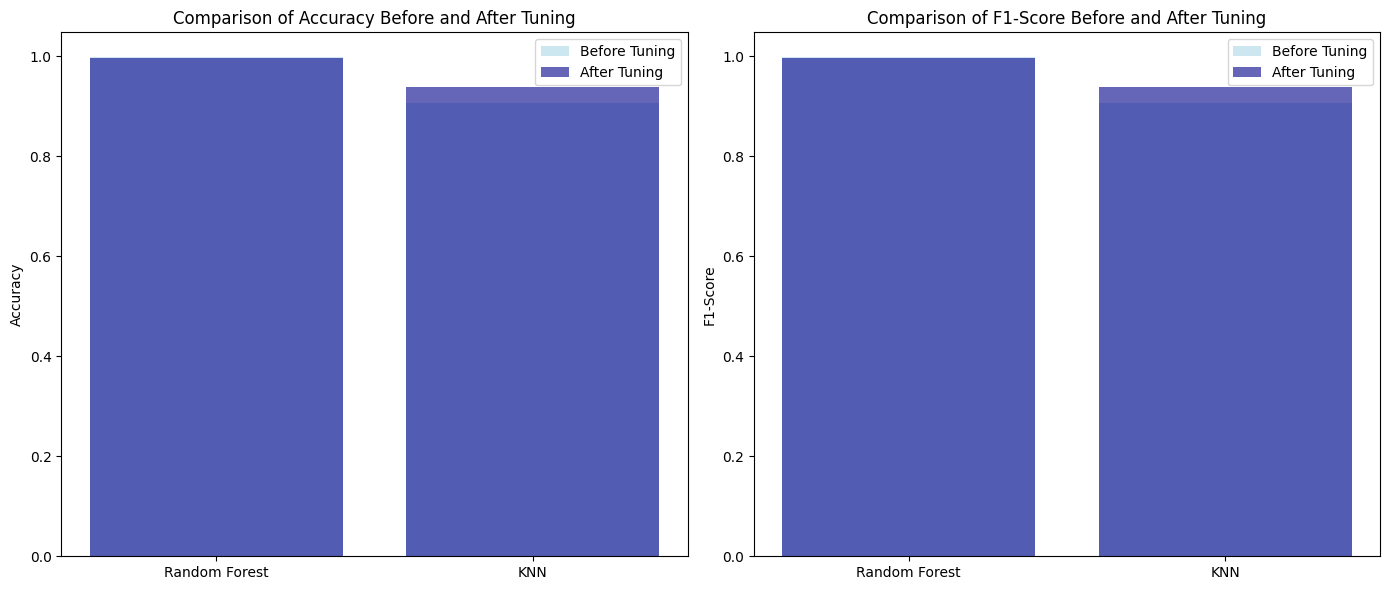

In [14]:
import matplotlib.pyplot as plt

# Data untuk visualisasi
models = ['Random Forest', 'KNN']
accuracy_before = [rf_accuracy, knn_accuracy]
accuracy_after = [rf_accuracy_best, knn_accuracy_best]
f1_score_before_rf = classification_report(y_test, rf_y_pred, output_dict=True)['accuracy']
f1_score_after_rf = classification_report(y_test, rf_y_pred_best, output_dict=True)['accuracy']
f1_score_before_knn = classification_report(y_test, knn_y_pred, output_dict=True)['accuracy']
f1_score_after_knn = classification_report(y_test, knn_y_pred_best, output_dict=True)['accuracy']

# Visualisasi Accuracy dan F1-Score
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Accuracy
ax[0].bar(models, accuracy_before, alpha=0.6, label='Before Tuning', color='lightblue')
ax[0].bar(models, accuracy_after, alpha=0.6, label='After Tuning', color='darkblue')
ax[0].set_title('Comparison of Accuracy Before and After Tuning')
ax[0].set_ylabel('Accuracy')
ax[0].legend()

# F1-Score
ax[1].bar(models, [f1_score_before_rf, f1_score_before_knn], alpha=0.6, label='Before Tuning', color='lightblue')
ax[1].bar(models, [f1_score_after_rf, f1_score_after_knn], alpha=0.6, label='After Tuning', color='darkblue')
ax[1].set_title('Comparison of F1-Score Before and After Tuning')
ax[1].set_ylabel('F1-Score')
ax[1].legend()

plt.tight_layout()
plt.show()